In [12]:
import glob
import pandas as pd

# Read X_train
X_train = pd.read_csv('X_train.csv')

# Read X_test
X_test = pd.read_csv('X_test.csv')

# Read y_train
y_train = pd.read_csv('y_train.csv')

# Read y_test
y_test = pd.read_csv('y_test.csv')


X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

data = pd.concat([X, y], axis=1)


In [13]:
X = data.drop('income', axis=1)
y = data['income']

missing_percentage = X.isnull().mean() * 100

# Print the missing values percentage
print(missing_percentage)


age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
capital-netGain    0.0
dtype: float64


In [14]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the categorical variables in X
label_encoder = LabelEncoder()
X_encoded = X.copy()
print(X_encoded.columns)
for column in X_encoded.columns:
	if X_encoded[column].dtype == 'object':
		X_encoded[column] = label_encoder.fit_transform(X_encoded[column])


X_encoded.head()


Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'capital-netGain'],
      dtype='object')


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-netGain
0,22,4,239806,10,4,8,2,4,0,0,0,40.0,25,0
1,31,5,41493,12,4,5,1,4,0,0,0,45.0,38,0
2,67,2,181220,9,0,1,1,2,0,0,0,20.0,38,0
3,30,4,206512,12,4,4,1,4,1,0,0,44.0,38,0
4,36,4,28572,9,2,3,0,4,1,0,0,50.0,38,0


age


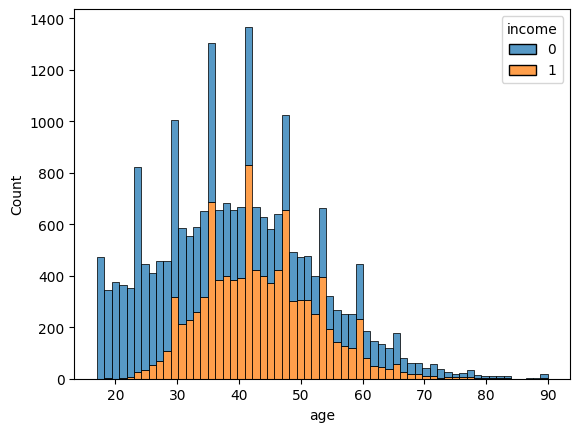

workclass


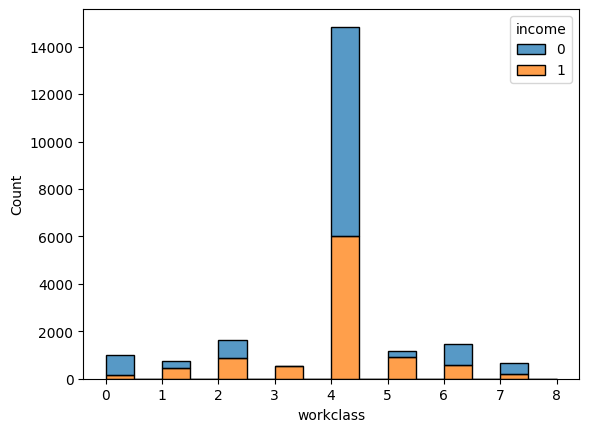

fnlwgt


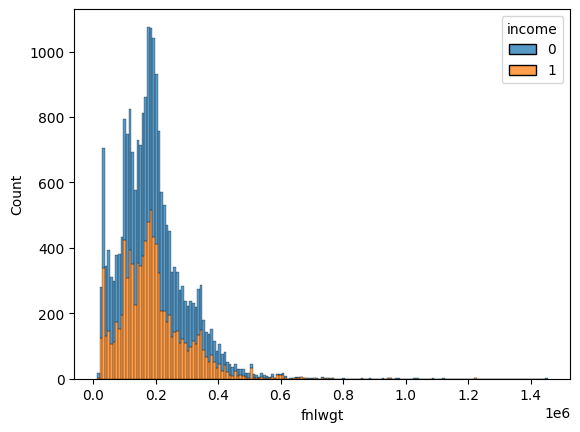

education


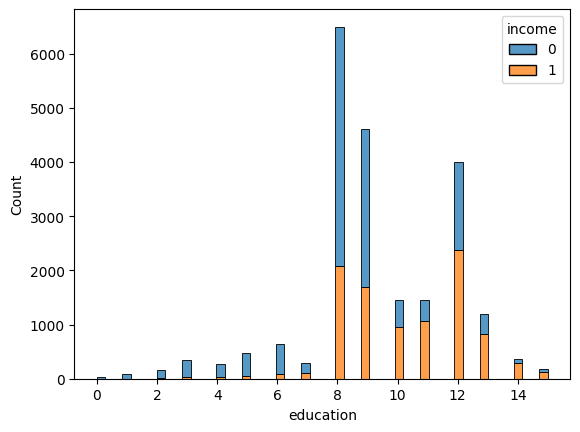

marital-status


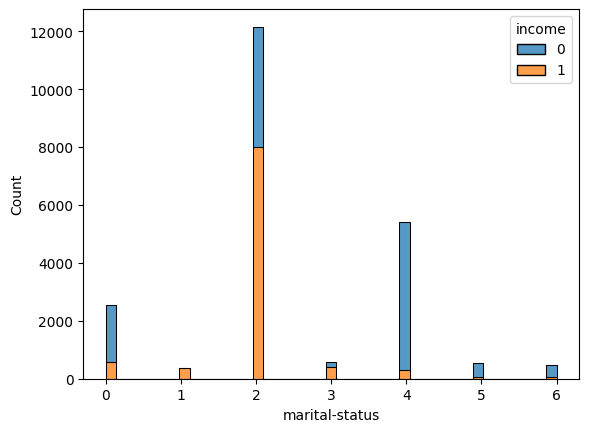

occupation


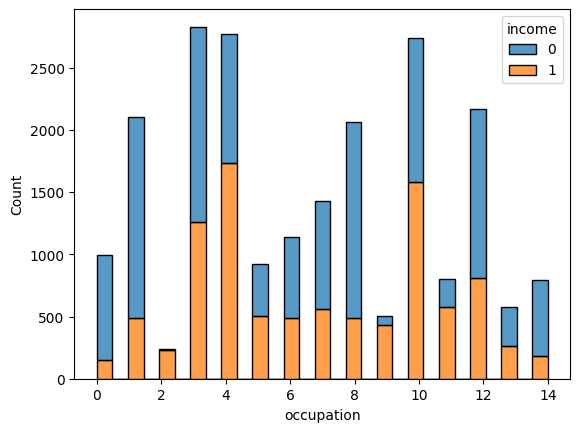

relationship


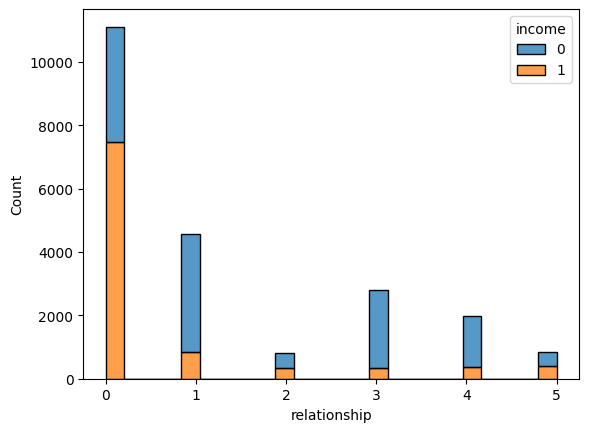

race


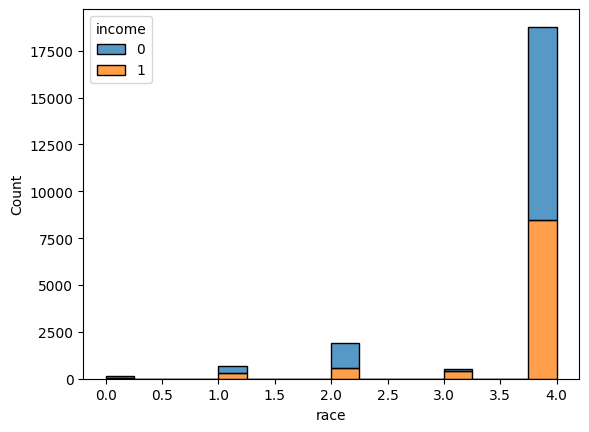

sex


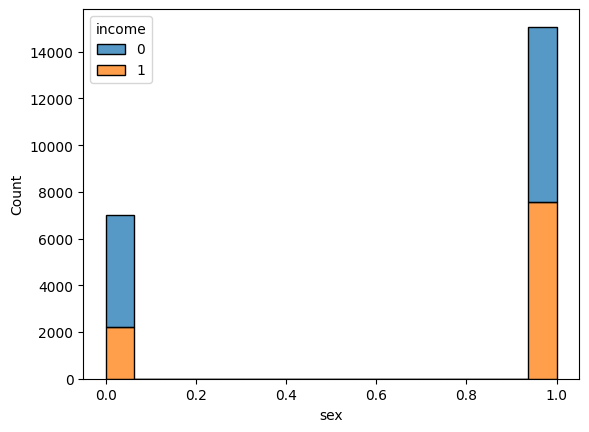

capital-gain


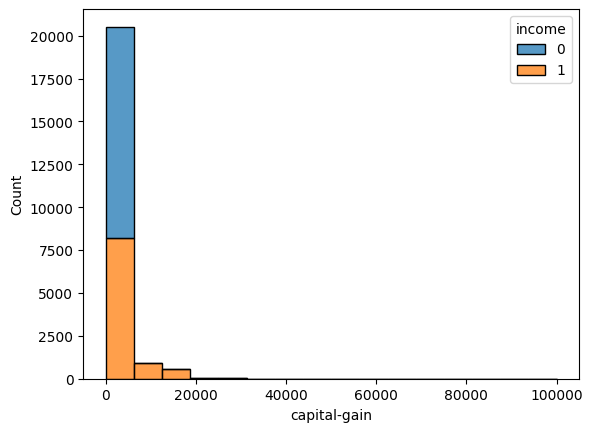

capital-loss


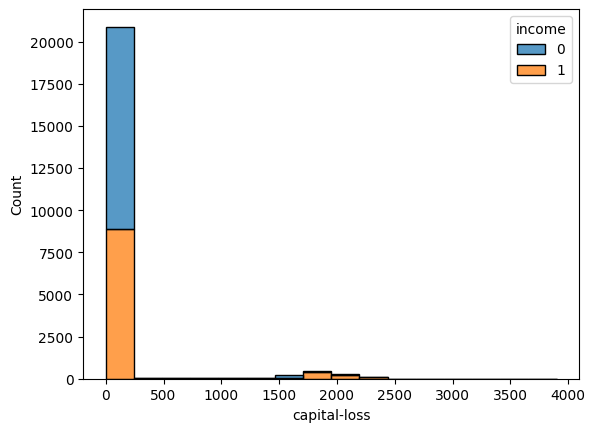

hours-per-week


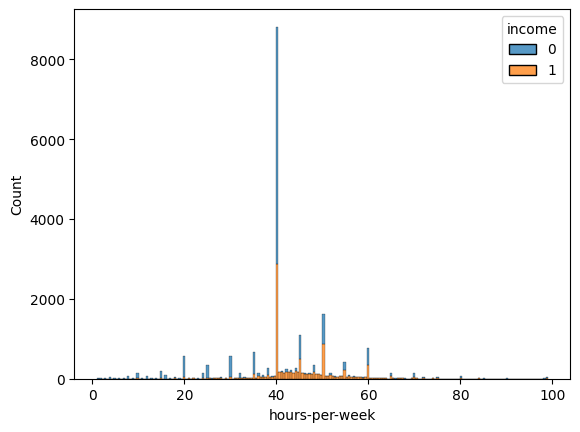

native-country


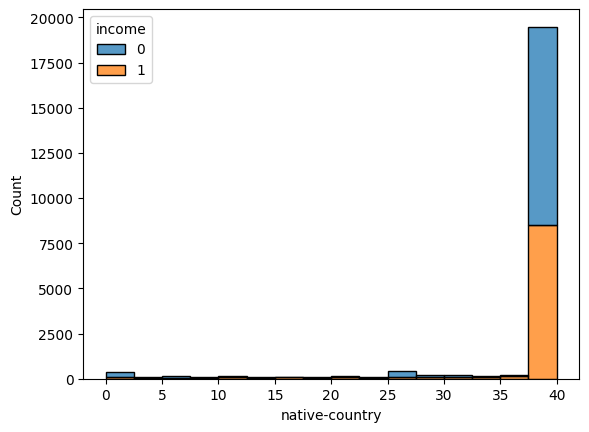

capital-netGain


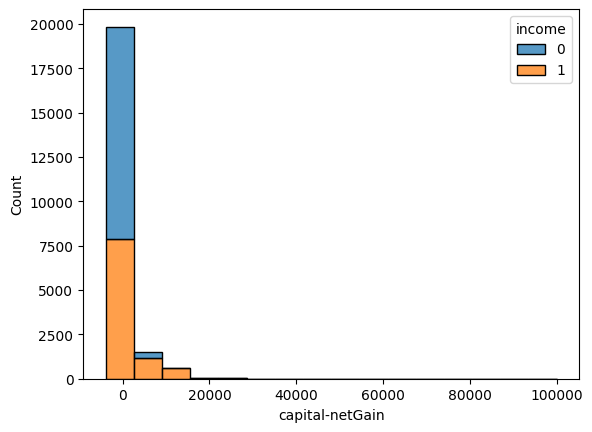

In [15]:
for column in X_encoded.columns:
	print(column)	
	sns.histplot(X_encoded, x=column, hue=y, multiple='stack')
	plt.show()

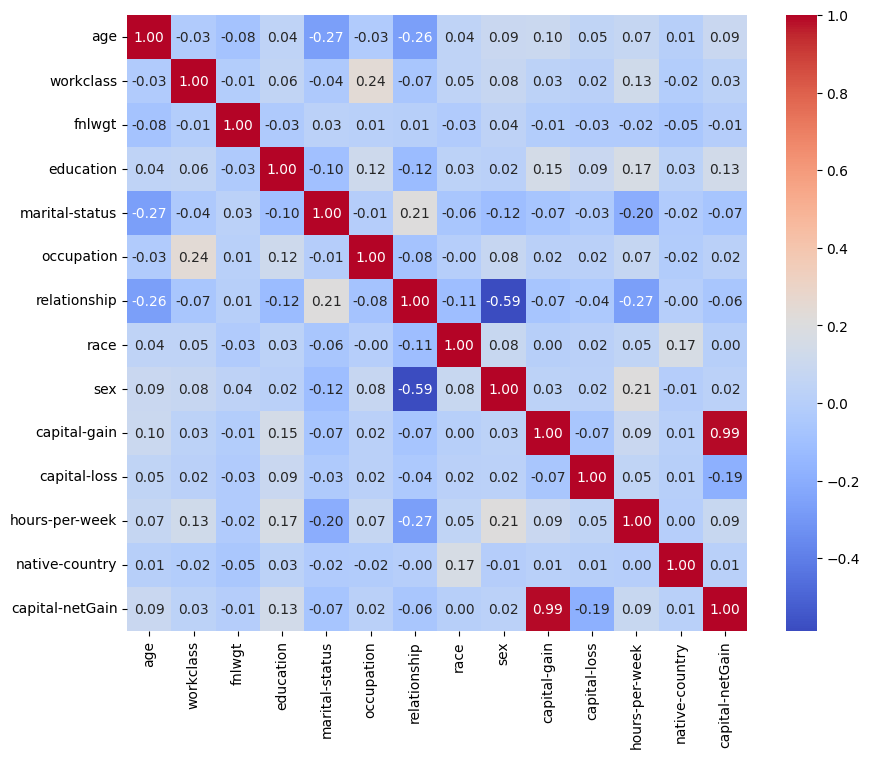

In [16]:
correlation = X_encoded.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size here

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [17]:
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

for column in non_numeric_columns:
	categories = X[column].unique()
	print(f"{column}: {categories}")
